<a href="https://colab.research.google.com/github/A-Burnhard/Boston-Housing-/blob/main/Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [ ]:
regression_data = pd.read_csv('housing.csv')
regression_data.head()

**Pre-processing**

In [ ]:
# Identify missing values
missing_values = regression_data.isnull().sum()
print("Missing values:\n", missing_values)

In [ ]:
# Replace missing values with mean or median if any
regression_data.fillna(regression_data.mean(), inplace=True)

**Identifying Duplicates**

In [ ]:
# Identify duplicate rows
duplicates = regression_data.duplicated()
print("Duplicates instances: \n",duplicates)

**Outlier detection**

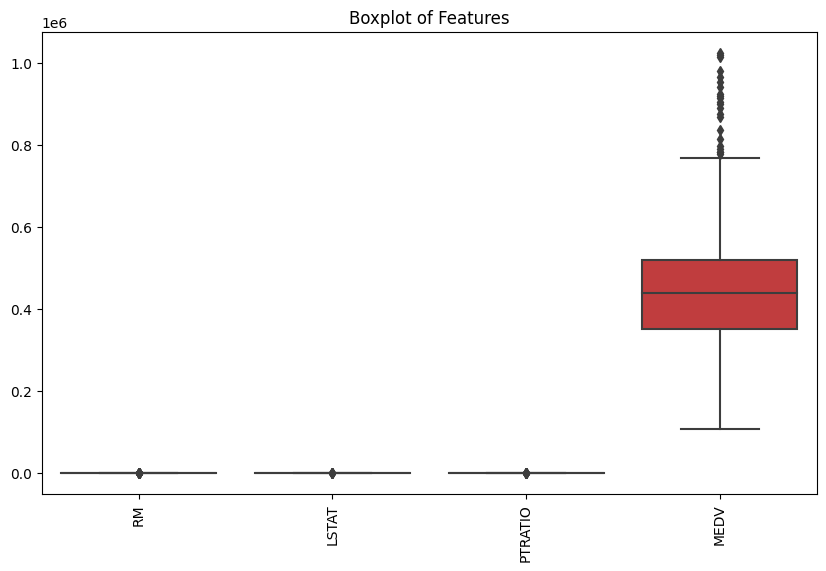

Number of outliers: 45
Outliers transformed.


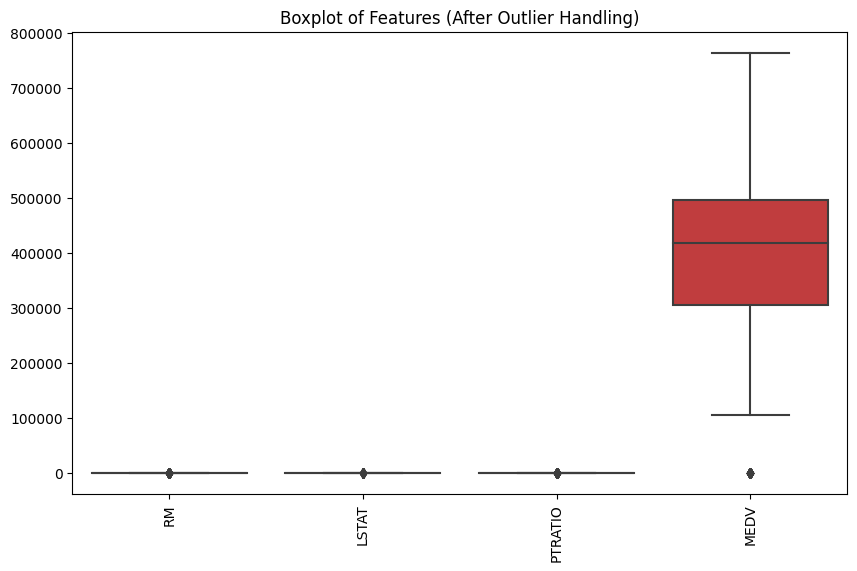

In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = regression_data

# Visualize the distribution of each feature using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Boxplot of Features')
plt.show()

# Identify outliers using statistical methods (e.g., Z-score or IQR)
# Z-score method
from scipy.stats import zscore

data = regression_data
z_scores = zscore(data)
outlier_threshold = 3  # Adjust the threshold as per your preference
outliers = (abs(z_scores) > outlier_threshold).any(axis=1)

# IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

# Count the number of outliers
num_outliers = outliers.sum()
print(f"Number of outliers: {num_outliers}")

# Decide whether to remove outliers or transform them
remove_outliers = False

if remove_outliers:
    # Remove outliers from the dataset
    data = data[~outliers]
    print("Outliers removed.")
else:
    # Transform outliers to a specific value
    outlier_value = 8  # Choose an appropriate value for transformation
    data[outliers] = outlier_value
    print("Outliers transformed.")

# Updated visualization after handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Boxplot of Features (After Outlier Handling)')
plt.show()

**Defining X and Y values**

In [ ]:
# Separate the target variable (class) from the features
iris_data = pd.read_csv("iris.data", names=cols)

X = iris_data.drop('class', axis=1)
y = iris_data['class']

# Convert the target variable to numeric labels
label_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y = y.map(label_mapping)

**Influencial datapoint detection using leverage and cooks distance**

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Load the Boston Housing dataset
df = regression_data
# Separate the target variable (y) and the independent variables (X)
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Add a constant column to X for the intercept term in the regression model
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Get the leverage of each data point
leverage = model.get_influence().hat_matrix_diag

# Get Cook's distance for each data point
cooks_distance = model.get_influence().cooks_distance[0]

# Combine leverage and Cook's distance into a DataFrame
influential_data_points = pd.DataFrame({'Leverage': leverage, "Cook's Distance": cooks_distance}, index=df.index)

# Print the data points with high leverage and Cook's distance
threshold_leverage = 2 * (X.shape[1] / X.shape[0])  # Threshold for high leverage points
threshold_cooks_distance = 4 / (X.shape[0] - X.shape[1] - 1)  # Threshold for influential points

print("Data Points with High Leverage:")
print(influential_data_points[influential_data_points['Leverage'] > threshold_leverage])

print("\nData Points with High Cook's Distance:")
print(influential_data_points[influential_data_points["Cook's Distance"] > threshold_cooks_distance])


**Normality of the set of features using shapiro**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the Boston Housing dataset
boston = regression_data

# Extract feature variables (independent variables)
X = boston.drop(columns=["MEDV"])  # Remove the target variable 'MEDV'

# Add a constant column for the intercept in the regression model
X = sm.add_constant(X)

# Target variable (dependent variable)
y = boston["MEDV"]

# Loop through each feature and perform linear regression
for feature in X.columns:
    model = sm.OLS(y, X[feature])
    results = model.fit()

    # Get the residuals (differences between predicted values and actual values)
    residuals = results.resid

    # Check normality of residuals using a histogram
    plt.figure()
    plt.hist(residuals, bins=20)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title(f"{feature} Residuals Histogram")
    plt.show()


**Data Transformation**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Step 1: Load the Boston Housing dataset
data = pd.read_csv("housing.csv")

# Step 2: Split the data into features (X) and target variable (y)
X = data.drop("MEDV", axis=1)  # Drop the target variable "medv" from the features
y = data["MEDV"]  # Target variable

# Step 3: Apply the logarithmic transformation to the target variable (y)
y_log = np.log1p(y)  # Use numpy's log1p to apply the logarithmic transformation

# Step 4: Split the transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Step 5: Perform regression analysis (Optional, just for demonstration)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 6: Predict the transformed target variable on the test set
y_pred = regressor.predict(X_test)

# Optional: Calculate the mean squared error (MSE) to evaluate the regression model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


**Feature Selection**

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Load the Boston Housing dataset
data = pd.read_csv("housing.csv")

# Separate features and target
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Create Recursive Feature Elimination (RFE) object
rfe = RFE(model, n_features_to_select=5)

# Fit the RFE on the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['RM', 'LSTAT', 'PTRATIO'], dtype='object')


**Oversampling techniques using the Synthetic Minority Over-sampling Technique (SMOTE) to balance the imbalanced dataset**

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE


# Create a SMOTE object
smote = SMOTE()

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the balanced class distribution
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

**Selecting Appropriate Learners for Training and Validation (Decision trees  and Gradient boosting)**

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, LeaveOneOut, train_test_split
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Load the Boston Housing dataset
data = pd.read_csv("housing.csv")


# Separate features (X) and target (y)
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Define learners
decision_tree = DecisionTreeRegressor()
xgboost_model = XGBRegressor()

# K-fold cross-validation
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

decision_tree_rmse_kfold = []
xgboost_rmse_kfold = []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit and predict using Decision Tree
    decision_tree.fit(X_train, y_train)
    y_pred_dt = decision_tree.predict(X_test)
    decision_tree_rmse_kfold.append(np.sqrt(mean_squared_error(y_test, y_pred_dt)))

    # Fit and predict using XGBoost
    xgboost_model.fit(X_train, y_train)
    y_pred_xgb = xgboost_model.predict(X_test)
    xgboost_rmse_kfold.append(np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

# Leave-one-out cross-validation
loo = LeaveOneOut()

decision_tree_rmse_loo = []
xgboost_rmse_loo = []

for train_idx, test_idx in loo.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit and predict using Decision Tree
    decision_tree.fit(X_train, y_train)
    y_pred_dt = decision_tree.predict(X_test)
    decision_tree_rmse_loo.append(np.sqrt(mean_squared_error(y_test, y_pred_dt)))

    # Fit and predict using XGBoost
    xgboost_model.fit(X_train, y_train)
    y_pred_xgb = xgboost_model.predict(X_test)
    xgboost_rmse_loo.append(np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

# Percentage split
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Fit and predict using Decision Tree
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
decision_tree_rmse_percentage_split = np.sqrt(mean_squared_error(y_test, y_pred_dt))

# Fit and predict using XGBoost
xgboost_model.fit(X_train, y_train)
y_pred_xgb = xgboost_model.predict(X_test)
xgboost_rmse_percentage_split = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

# Print the results
print(f"Decision Tree RMSE (K-Fold Cross-Validation): {np.mean(decision_tree_rmse_kfold)}")
print(f"XGBoost RMSE (K-Fold Cross-Validation): {np.mean(xgboost_rmse_kfold)}")

print(f"Decision Tree RMSE (Leave-One-Out Cross-Validation): {np.mean(decision_tree_rmse_loo)}")
print(f"XGBoost RMSE (Leave-One-Out Cross-Validation): {np.mean(xgboost_rmse_loo)}")

print(f"Decision Tree RMSE (Percentage Split): {decision_tree_rmse_percentage_split}")
print(f"XGBoost RMSE (Percentage Split): {xgboost_rmse_percentage_split}")


Decision Tree RMSE (K-Fold Cross-Validation): 84760.9246229316
XGBoost RMSE (K-Fold Cross-Validation): 67005.19322196867
Decision Tree RMSE (Leave-One-Out Cross-Validation): 58842.94478527607
XGBoost RMSE (Leave-One-Out Cross-Validation): 46935.13193047022
Decision Tree RMSE (Percentage Split): 76355.54989652029
XGBoost RMSE (Percentage Split): 60380.47988472507


**calculate RMSE and R-squared**

In [27]:
from sklearn.model_selection import cross_val_score

# Calculate evaluation metrics using K-fold cross-validation for Decision Tree
decision_tree_mse_kfold = cross_val_score(decision_tree, X, y, scoring='neg_mean_squared_error', cv=kf)
decision_tree_rmse_kfold = np.sqrt(-decision_tree_mse_kfold)
decision_tree_mae_kfold = cross_val_score(decision_tree, X, y, scoring='neg_mean_absolute_error', cv=kf)
decision_tree_r2_kfold = cross_val_score(decision_tree, X, y, scoring='r2', cv=kf)

# Calculate evaluation metrics using K-fold cross-validation for XGBoost
xgboost_mse_kfold = cross_val_score(xgboost_model, X, y, scoring='neg_mean_squared_error', cv=kf)
xgboost_rmse_kfold = np.sqrt(-xgboost_mse_kfold)
xgboost_mae_kfold = cross_val_score(xgboost_model, X, y, scoring='neg_mean_absolute_error', cv=kf)
xgboost_r2_kfold = cross_val_score(xgboost_model, X, y, scoring='r2', cv=kf)

# Print the results
print("Decision Tree Metrics (K-Fold Cross-Validation):")
print(f"RMSE: {np.mean(decision_tree_rmse_kfold)}")
print(f"MAE: {np.mean(np.abs(decision_tree_mae_kfold))}")
print(f"R-squared: {np.mean(decision_tree_r2_kfold)}")

print("\nXGBoost Metrics (K-Fold Cross-Validation):")
print(f"RMSE: {np.mean(xgboost_rmse_kfold)}")
print(f"MAE: {np.mean(np.abs(xgboost_mae_kfold))}")
print(f"R-squared: {np.mean(xgboost_r2_kfold)}")


Decision Tree Metrics (K-Fold Cross-Validation):
RMSE: 84876.90999166263
MAE: 58323.62297496318
R-squared: 0.7726063374116167

XGBoost Metrics (K-Fold Cross-Validation):
RMSE: 67005.19322196867
MAE: 46736.76556880525
R-squared: 0.8496840167479753
